In [1]:
import pandas as pd
df = pd.read_csv("ready_to_model_with_tugs.csv")
df.head()

,MMSI,track_num,cumulative_distance,cumulative_heading,SOG_mean,SOG_median,SOG_std,Status,Length,Width,Draft,SuperClass,norm_heading
0,527918,0,2.662621,0.0,1.189537,0.0,2.739407,-1,20.0,7.0,0.0,3,0.0
1,527918,1,2.229054,0.0,8.055952,9.8,3.638651,-1,20.0,7.0,0.0,3,0.0
2,527918,2,0.018335,0.0,0.279167,0.0,0.680412,-1,20.0,7.0,0.0,3,0.0
3,527918,3,0.028191,0.0,0.388136,0.0,1.179141,-1,20.0,7.0,0.0,3,0.0
4,527918,4,0.036418,0.0,0.020307,0.0,0.282021,-1,20.0,7.0,0.0,3,0.0


scale the data
split test/train
random forest

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [14]:
#X = df[["cumulative_distance","cumulative_heading","SOG_mean",
#        "SOG_median","SOG_std","Status","Length","Width","Draft","norm_heading"]]

X = df[["cumulative_distance","SOG_mean", "SOG_std", "norm_heading"]]

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [15]:
y = df[["SuperClass"]]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify=y)

In [17]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train)

C:\Users\gator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9768920240547683

In [18]:
model.score(X_test, y_test)

0.6730201007116401

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180F87DE388>]],
      dtype=object)

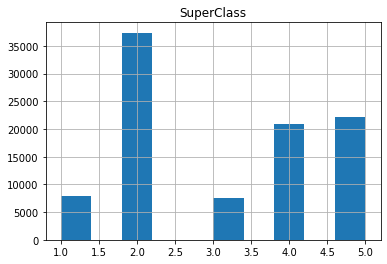

In [19]:
y_train.hist(column='SuperClass')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180F684C288>]],
      dtype=object)

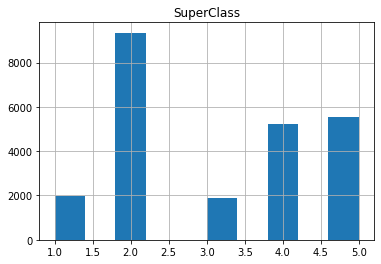

In [20]:
y_test.hist(column='SuperClass')

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, model.predict(X_train))

array([[ 7694,    96,     3,   137,    53],
       [   48, 37052,    72,    36,   174],
       [   14,   492,  6985,     1,    62],
       [   89,    52,     9, 20757,    66],
       [   48,   644,    51,    74, 21405]], dtype=int64)

In [22]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 686,  121,   16,  935,  238],
       [ 134, 7518,  428,  221, 1045],
       [  15,  963,  585,   18,  308],
       [ 623,  144,   24, 4129,  323],
       [ 189, 1546,  274,  292, 3254]], dtype=int64)

In [35]:
df2 = pd.read_csv("ready_to_model_with_tugs.csv")

In [36]:
df2[df2['SuperClass'] == 4] = 1
df2[df2['SuperClass'] == 5] = 5

In [37]:
X = df2[["cumulative_distance","SOG_mean", "SOG_std", "norm_heading"]]

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df2[["SuperClass"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify=y)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print("Training: ", model.score(X_train, y_train))
print("Test: ", (model.score(X_test, y_test)))
      

C:\Users\gator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training:  0.9888049607757454
Test:  0.9007449332057098


In [30]:
print("Training:\n", confusion_matrix(y_train, model.predict(X_train)))
print("Test:\n", confusion_matrix(y_test, model.predict(X_test)))

Training:
 [[28802    85     3    66]
 [  123 37009    54   196]
 [   18   510  6979    47]
 [   91   680    70 21381]]
Test:
 [[6763  152    8  316]
 [ 230 7542  390 1184]
 [  22 1028  529  310]
 [ 311 1514  253 3477]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180F71C2448>]],
      dtype=object)

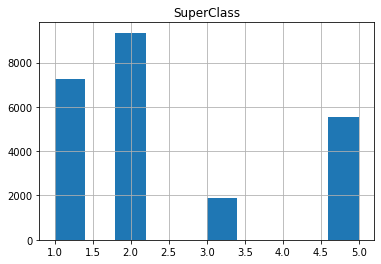

In [31]:
y_test.hist()

(array([ 7326.,     0., 10236.,     0.,     0.,  1180.,     0.,     0.,
            0.,  5287.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

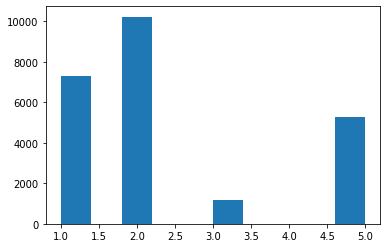

In [34]:
import matplotlib.pyplot as plt
plt.hist(model.predict(X_test))